Shape before deleting duplicate values: (1000, 21)
Len of nonNum: 18
Len of num: 3
headers len: 21
Shape After deleting duplicate values: (1000, 21)
odobren kredit 180
Prosecan iznos kredita 3271.258
Prosecan trajnanje kredita 20.903
Prosecna kamata 2.973


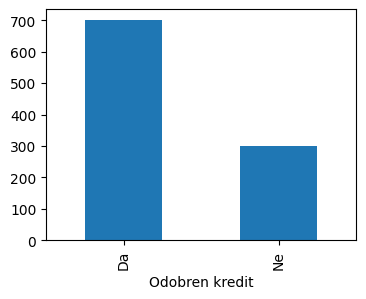

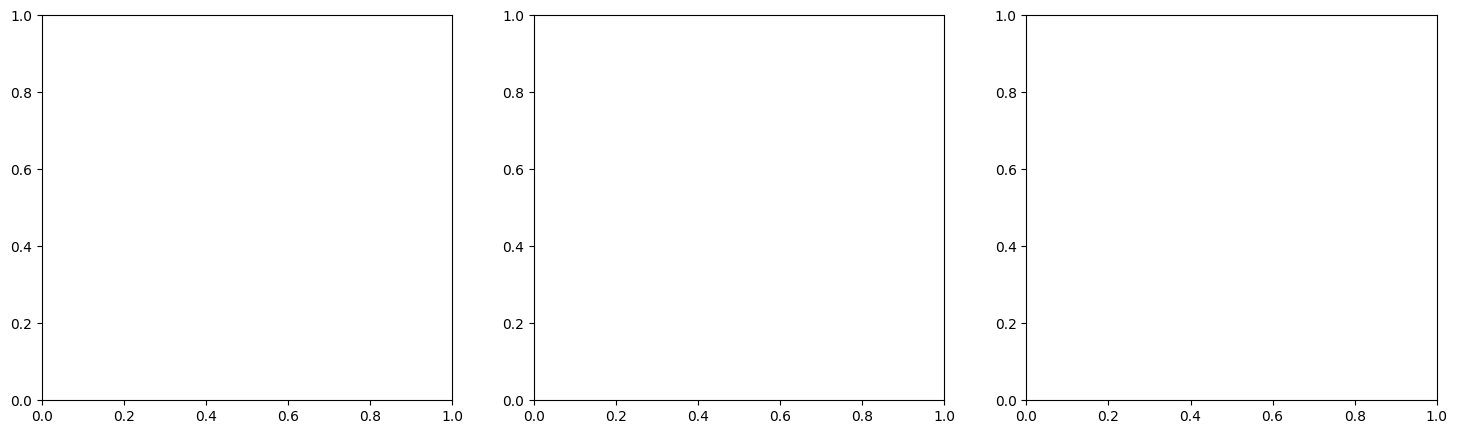

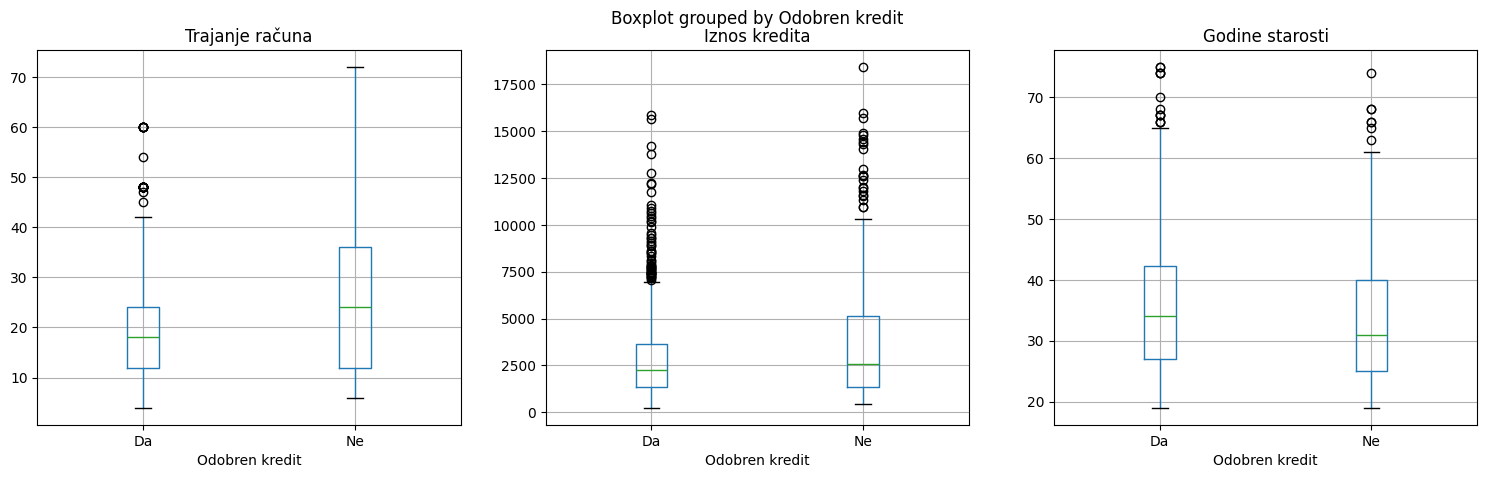

In [95]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

# load dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('german_credit.dat', header=None)
headers=["Stanje na računu","Trajanje računa","Istorija kredita",\
         "Svrha uzimanja","Iznos kredita","Račun za štednju","Zaposlenost",\
         "Kamata – u procentima od tekućih prihoda","Pol i bračni staus",\
         "Žirant Ko-aplikant","Prebivalište (u godinama)","Imovina","Godine starosti",\
        "Plaćanje u ratama","Stan/Kuća","Postojeći kredit u ovoj banci",\
        "Vrsta posla","Izdržavani: broj lica koji zavise od prihoda aplikanta","Telefon","Radnik stranac","Odobren kredit"]
data.columns = headers
print('Shape before deleting duplicate values:', data.shape)

numerical = ["Trajanje računa","Iznos kredita","Godine starosti"]
nonNumerical = ["Stanje na računu","Istorija kredita","Svrha uzimanja","Račun za štednju","Zaposlenost","Kamata – u procentima od tekućih prihoda","Pol i bračni staus","Žirant Ko-aplikant","Prebivalište (u godinama)","Imovina", "Plaćanje u ratama","Stan/Kuća","Postojeći kredit u ovoj banci","Vrsta posla","Izdržavani: broj lica koji zavise od prihoda aplikanta","Telefon","Radnik stranac","Odobren kredit"]

print('Len of nonNum:', len(nonNumerical))
print('Len of num:', len(numerical))
print('headers len:', len(headers))
# print("Columns data types:\n{}".format(data.dtypes))

# save data to csv
data.to_csv("german_credit_data_with_header.csv", index=False)

#for structuring only
#map status of existing checking account
Status_of_existing_checking_account={'A14':"nema računa u ovoj banci",'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM "}
data["Stanje na računu"]=data["Stanje na računu"].map(Status_of_existing_checking_account)

#map values for Istorija kredita
Credit_history={' "A34"':"kritičan račun",' "A33"':"kašnjenje sa uplatama",' "A32"':"drugi krediti plaćani na vreme",' "A31"':"svi krediti u ovoj banci vraćeni na vreme",' "A30"':"nema uzetih kredita"}
data["Istorija kredita"]=data["Istorija kredita"].map(Credit_history)

#map values for Purpose
Purpose={' "A40"' : "automobil (nov)",' "A41"': "automobil (polovan)", ' "A42"' : "nameštaj", 
         ' "A43"' :"muzička tehnika/televizija" , ' "A44"' : "bela tehnika", ' "A45"' : "popravka",
           ' "A46"' : "obrazovanje", ' "A47"' : 'odmor',' "A48"' : 'prekvalifikovanje',' "A49"' : 'biznis',' "A410"' : 'ostalo'}
data["Svrha uzimanja"]=data["Svrha uzimanja"].map(Purpose)

# map values for saving account
Saving_account={' "A65"' : "nema račun za štednju",' "A61"' :"<100 DM",' "A62"' : "100 <= <500 DM",' "A63"' :"500 <= < 1000 DM", ' "A64"' :">= 1000 DM"}
data["Račun za štednju"]=data["Račun za štednju"].map(Saving_account)

# map values Zaposlenost
Present_employment={' "A75"':">=7 godina", ' "A74"':"4<= <7 godina",  ' "A73"':"1<= < 4 godina", ' "A72"':"<=1 godina", ' "A71"':"nezaposlen"}
data["Zaposlenost"]=data["Zaposlenost"].map(Present_employment)

# map values for personal relationship status and sex
Personal_status_and_sex={ ' "A95"':"žensko, neudata",' "A94"':"muško, oženjen/udovac",' "A93"':"muško, neoženjen", ' "A92"':"žensko, udata/razvedena", ' "A91"':"muško, razveden"}
data["Pol i bračni staus"]=data["Pol i bračni staus"].map(Personal_status_and_sex)

# map values for other debtors and guarantors
Other_debtors_guarantors={' "A101"':"nema", ' "A102"':"ko-aplikant", ' "A103"':"žirant"}
data["Žirant Ko-aplikant"]=data["Žirant Ko-aplikant"].map(Other_debtors_guarantors)

# map values for property
Property={' "A121"':"poseduje nekretninu", ' "A122"':"ulaganje u nekretnine/životno osiguranje", ' "A123"':"automobil ili drugo", ' "A124"':"nema"}
data["Imovina"]=data["Imovina"].map(Property)

# map values for other installment plans
Other_installment_plans={' "A143"':"nema", ' "A142"':"radnja", ' "A141"':"banka"}
data["Plaćanje u ratama"]=data["Plaćanje u ratama"].map(Other_installment_plans)

# map values for housing
Housing={' "A153"':"živi besplatno", ' "A152"':"poseduje", ' "A151"':"stanarina"}
data["Stan/Kuća"]=data["Stan/Kuća"].map(Housing)

# map values for Job
Job={' "A174"':"radi u menadžmentu/samo-zaposlen/visoko obrazovanje", ' "A173"':"zaposlen i ima zvanično obrazovanje", ' "A172"':"nema zvanično obrazovanje: ima stalan posao", ' "A171"':"nezposlen/nema zvanično obrazovanje"}
data["Vrsta posla"]=data["Vrsta posla"].map(Job)

# map values for telephone
Telephone={' "A192"':"ima", ' "A191"':"nema"}
data["Telefon"]=data["Telefon"].map(Telephone)

# map values for foreign workers
foreign_worker={' "A201"':"da", ' "A202"':"ne"}
data["Radnik stranac"]=data["Radnik stranac"].map(foreign_worker)

# map values for good and bad risk
risk={1:"Da", 2:"Ne"}
data["Odobren kredit"]=data["Odobren kredit"].map(risk)

# Remove duplicate rows if any
data = data.drop_duplicates()
print('Shape After deleting duplicate values:', data.shape)

# Start observing the Quantitative/Categorical/Qualitative variables
data.head(25)

# check for any of null values
data.isnull().values.any()

# save data to csv
data.to_csv("german_credit_data_with_header.csv", index=False, encoding='utf-8-sig')

# Creating Bar chart as the Target variable is Categorical
GroupedData = data.groupby('Odobren kredit').size()
GroupedData.plot(kind='bar', figsize=(4,3))


fig, PlotCanvas= plt.subplots(nrows=1, ncols=len(numerical), figsize=(18,5))

testData = data.head(250)
testData.head()


print(f"odobren kredit {len(testData[testData['Odobren kredit']=='Da'])}")
fig, PlotCanvas= plt.subplots(nrows=1, ncols=len(numerical), figsize=(18,5))
# Creating box plots for each continuous predictor against the Target Variable "GoodCredit"
for PredictorCol , i in zip(numerical, range(len(numerical))):
    data.boxplot(column=PredictorCol, by="Odobren kredit", figsize=(5,5), vert=True, ax=PlotCanvas[i])



print(f"Prosecan iznos kredita {data['Iznos kredita'].mean()}")
print(f"Prosecan trajnanje kredita {data['Trajanje računa'].mean()}")
print(f"Prosecna kamata {data['Kamata – u procentima od tekućih prihoda'].mean()}")

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
Decision Tree with gini criterion
              precision    recall  f1-score   support

           0       0.59      0.48      0.53        92
           1       0.79      0.85      0.82       208

    accuracy                           0.74       300
   macro avg       0.69      0.66      0.67       300
weighted avg       0.73      0.74      0.73       300

[[ 44  48]
 [ 31 177]]
Accuracy of the model on Testing Sample Data: 0.73
Decision Tree with gini criterion
              precision    recall  f1-score   support

           0       0.58      0.63      0.60        70
           1       0.85      0.82      0.84       180

    accuracy                           0.77       250
   macro avg       0.71      0.73      0.72       250
weighted avg       0.77      0.77      0.77       250

[[ 44  26]
 [ 32 148]]
Accuracy of the model on Testing Sample Data: 0.77

Accuracy values for 10-fold Cross Validation:
 [0.78041958 0.60475524 0.5

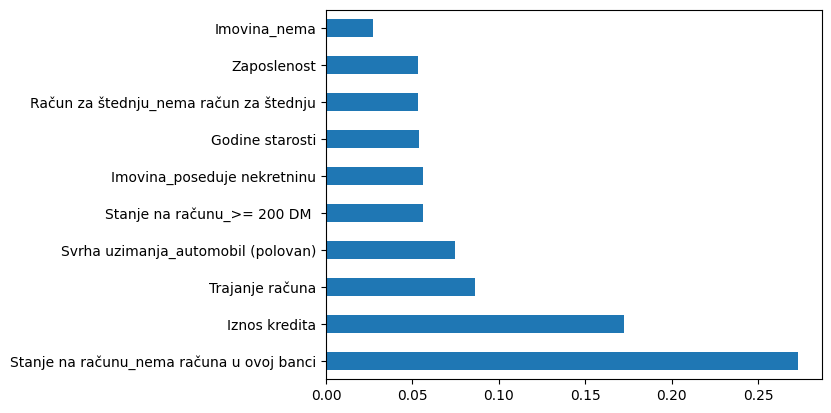

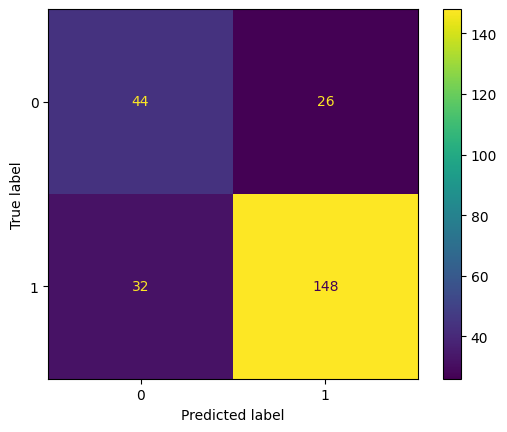

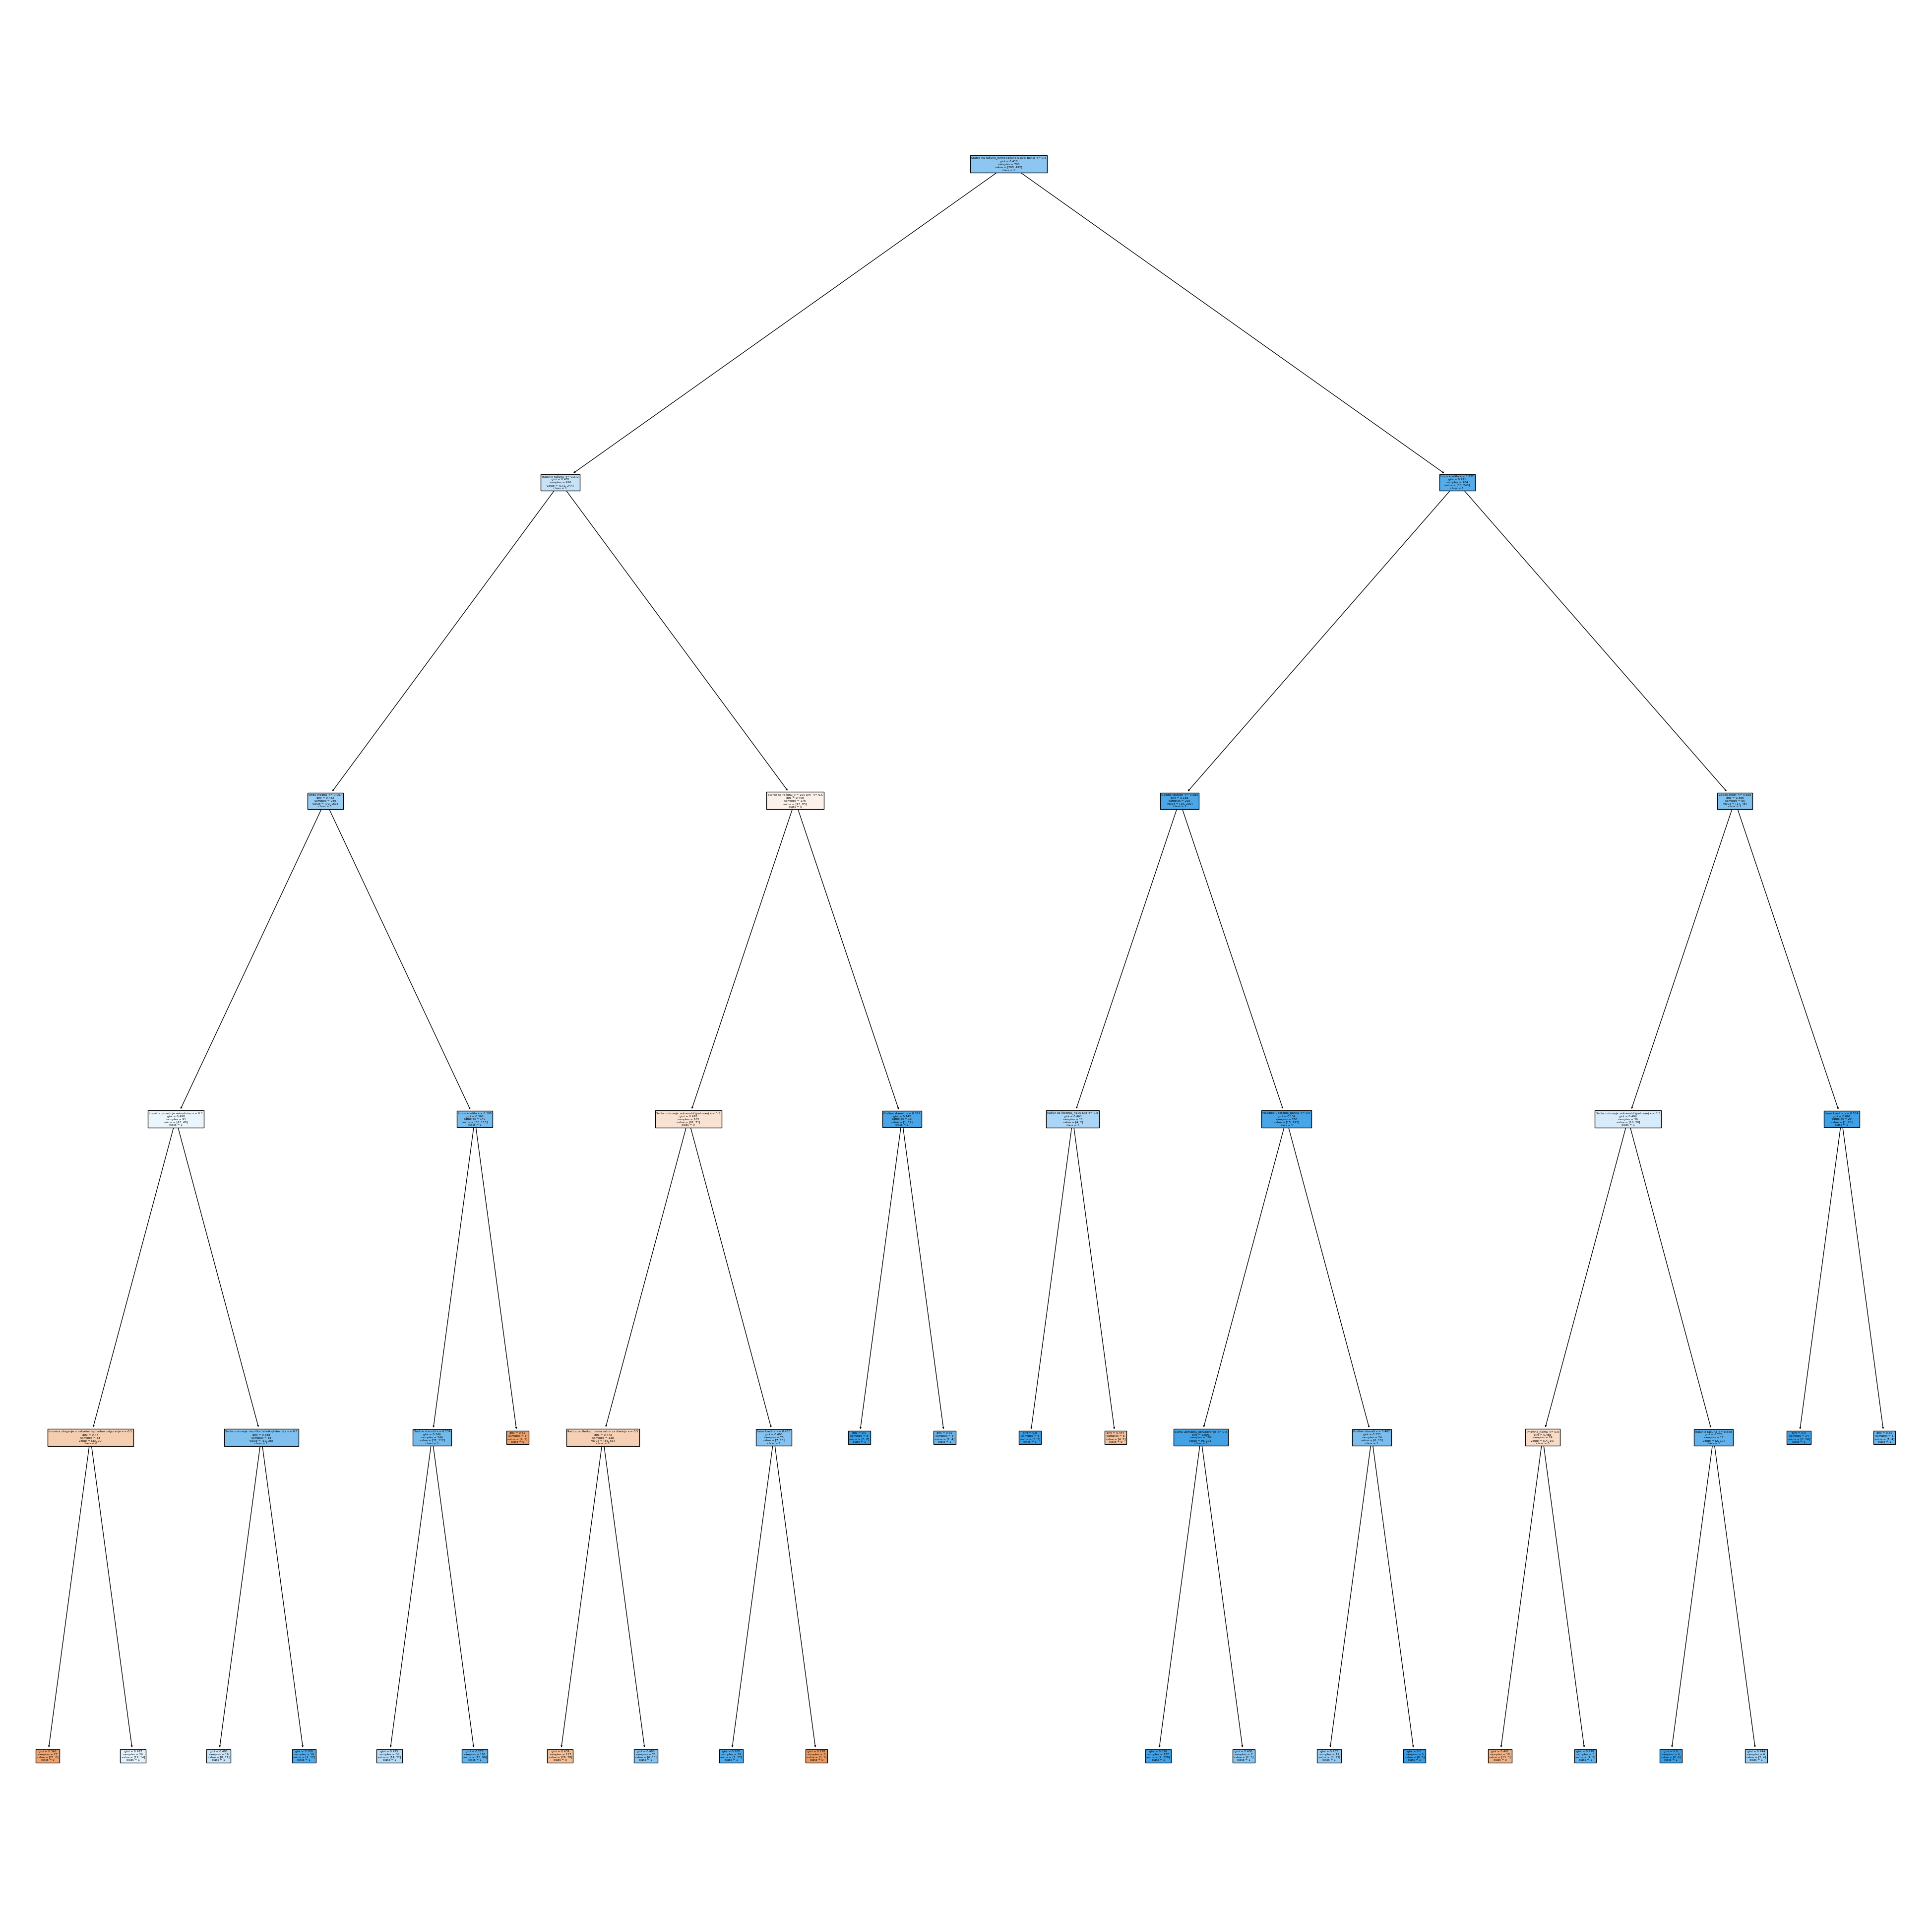

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)
Decision Tree with entropy criterion
              precision    recall  f1-score   support

           0       0.58      0.47      0.52        92
           1       0.78      0.85      0.82       208

    accuracy                           0.73       300
   macro avg       0.68      0.66      0.67       300
weighted avg       0.72      0.73      0.72       300

[[ 43  49]
 [ 31 177]]
Accuracy of the model on Testing Sample Data: 0.72
Decision Tree with entropy criterion
              precision    recall  f1-score   support

           0       0.58      0.63      0.60        70
           1       0.85      0.82      0.84       180

    accuracy                           0.77       250
   macro avg       0.71      0.73      0.72       250
weighted avg       0.77      0.77      0.77       250

[[ 44  26]
 [ 32 148]]
Accuracy of the model on Testing Sample Data: 0.77

Accuracy values for 10-fold Cross Validation:


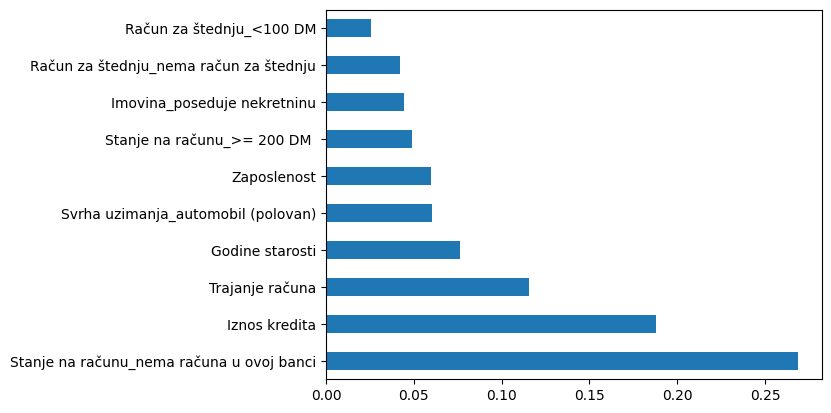

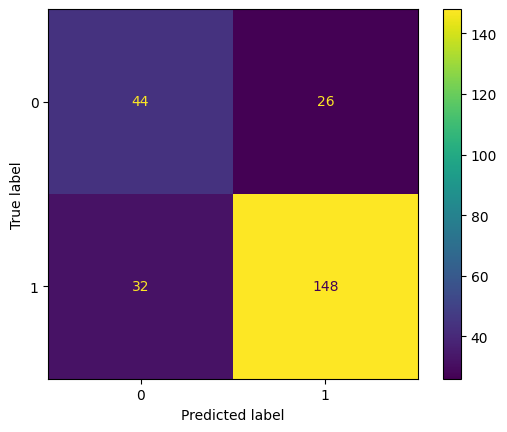

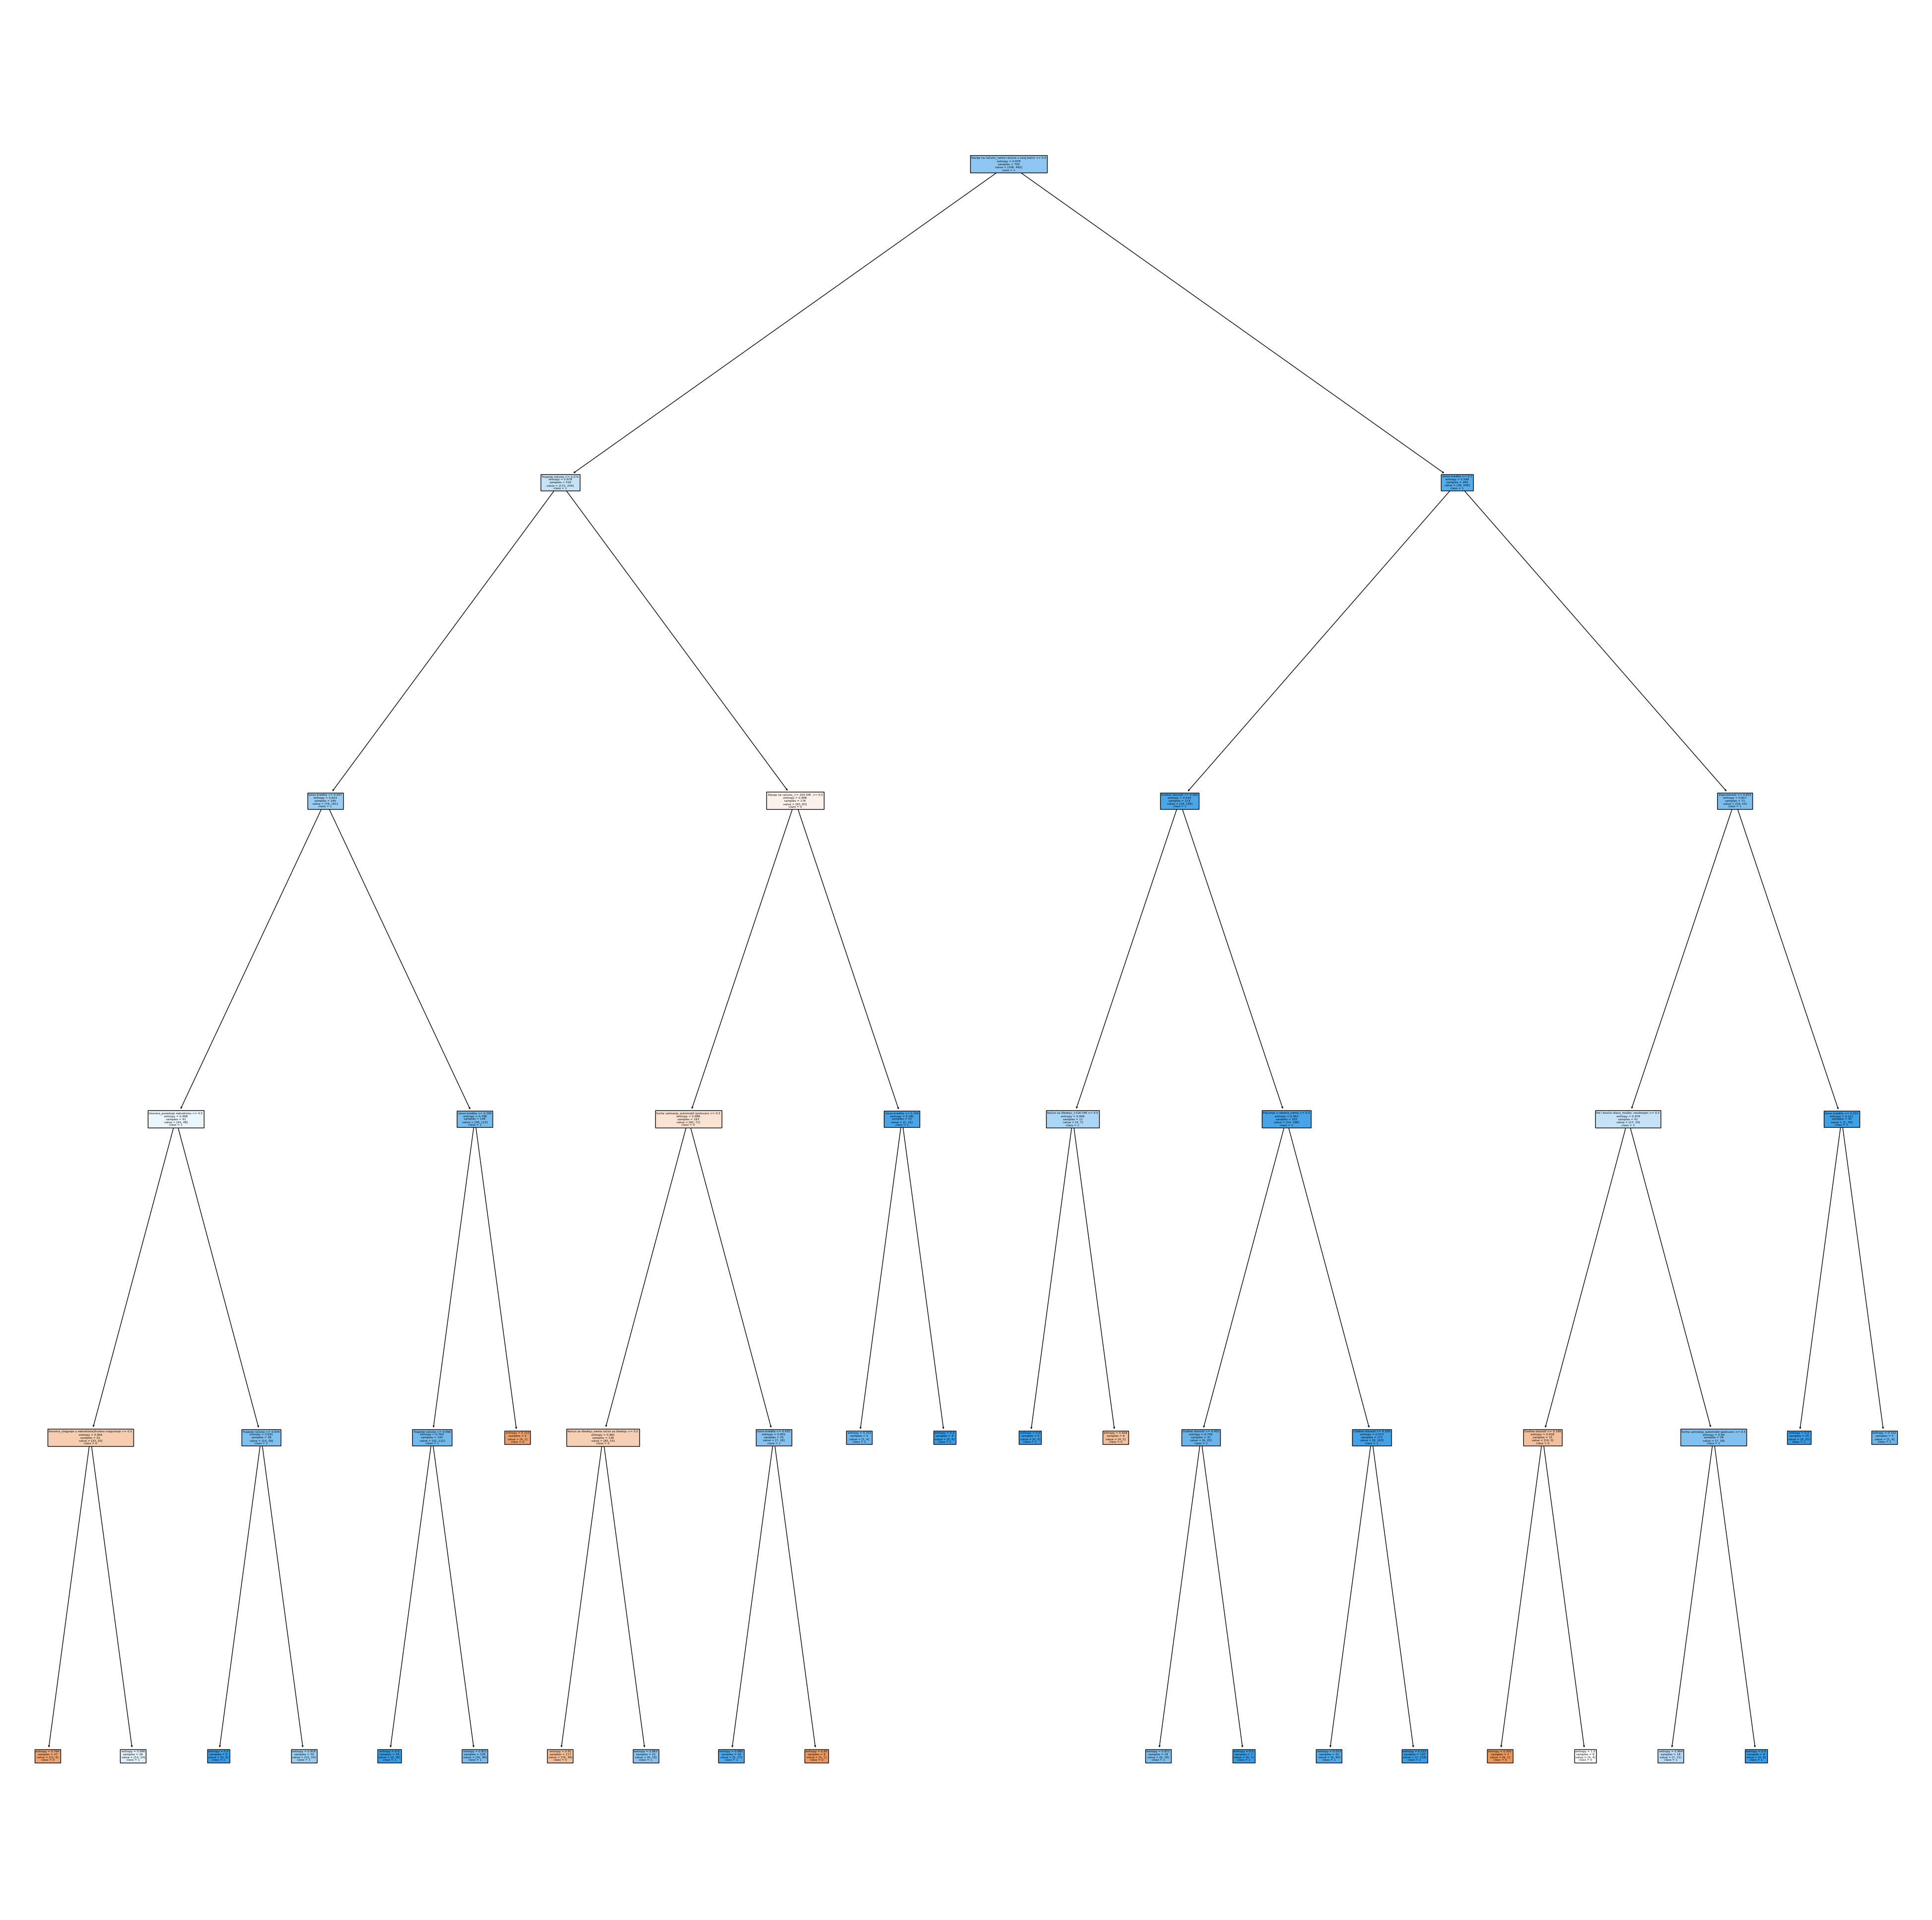

In [96]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix
from sklearn import preprocessing
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler

import statsmodels.api as sm

correlated_variables = ['Stanje na računu',
 'Istorija kredita',
 'Svrha uzimanja',
 'Račun za štednju',
 'Zaposlenost',
 'Pol i bračni staus',
 'Žirant Ko-aplikant',
 'Imovina',
 'Plaćanje u ratama',
 'Stan/Kuća',
 'Radnik stranac',
 'Godine starosti',
 'Iznos kredita',
 'Trajanje računa',
 'Odobren kredit']
Predictors=['Trajanje računa', 'Iznos kredita', 'Godine starosti', 'Zaposlenost',
       'Radnik stranac', 'Stanje na računu_0 <= <200 DM',
       'Stanje na računu_<0 DM', 'Stanje na računu_>= 200 DM ',
       'Stanje na računu_nema računa u ovoj banci',
       'Istorija kredita_drugi krediti plaćani na vreme',
       'Istorija kredita_kašnjenje sa uplatama',
       'Istorija kredita_kritičan račun',
       'Istorija kredita_nema uzetih kredita',
       'Istorija kredita_svi krediti u ovoj banci vraćeni na vreme',
       'Svrha uzimanja_automobil (nov)', 'Svrha uzimanja_automobil (polovan)',
       'Svrha uzimanja_bela tehnika', 'Svrha uzimanja_biznis',
       'Svrha uzimanja_muzička tehnika/televizija', 'Svrha uzimanja_nameštaj',
       'Svrha uzimanja_obrazovanje', 'Svrha uzimanja_ostalo',
       'Svrha uzimanja_popravka', 'Svrha uzimanja_prekvalifikovanje',
       'Račun za štednju_100 <= <500 DM', 'Račun za štednju_500 <= < 1000 DM',
       'Račun za štednju_<100 DM', 'Račun za štednju_>= 1000 DM',
       'Račun za štednju_nema račun za štednju',
       'Pol i bračni staus_muško, neoženjen',
       'Pol i bračni staus_muško, oženjen/udovac',
       'Pol i bračni staus_muško, razveden',
       'Pol i bračni staus_žensko, udata/razvedena',
       'Žirant Ko-aplikant_ko-aplikant', 'Žirant Ko-aplikant_nema',
       'Žirant Ko-aplikant_žirant', 'Imovina_automobil ili drugo',
       'Imovina_nema', 'Imovina_poseduje nekretninu',
       'Imovina_ulaganje u nekretnine/životno osiguranje',
       'Plaćanje u ratama_banka', 'Plaćanje u ratama_nema',
       'Plaćanje u ratama_radnja', 'Stan/Kuća_poseduje', 'Stan/Kuća_stanarina',
       'Stan/Kuća_živi besplatno']
TargetVariable='Odobren kredit'

######################## TEST DATA PREPARATION ##############################
dataForTest=testData[correlated_variables]
dataForTest['Radnik stranac'].replace({'da':1, 'ne':0}, inplace=True)
dataForTest['Zaposlenost'].replace({'>=7 godina':5, '1<= < 4 godina':3, '4<= <7 godina':4, 'nezaposlen':1, '<=1 godina':2}, inplace=True)
dataForTest['Odobren kredit'].replace({'Da':1, 'Ne':0}, inplace=True)
dataForTest_Numeric=pd.get_dummies(dataForTest).astype(int)
testX = dataForTest_Numeric[Predictors].values
testy=dataForTest_Numeric[TargetVariable].values
PredictorScaler=MinMaxScaler()
PredictorScalerTistFit=PredictorScaler.fit(testX)
testX=PredictorScalerTistFit.transform(testX)

DataForML = data[correlated_variables]
# print(DataForML.head())

# for corelated columns
DataForML['Radnik stranac'].replace({'da':1, 'ne':0}, inplace=True)
DataForML['Zaposlenost'].replace({'>=7 godina':5, '1<= < 4 godina':3, '4<= <7 godina':4, 'nezaposlen':1, '<=1 godina':2}, inplace=True)
DataForML['Odobren kredit'].replace({'Da':1, 'Ne':0}, inplace=True)


# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML).astype(int)

DataForML_Numeric.head()
# DataForML_Numeric.columns


DataForML_Numeric.to_csv("dataFroML.csv", index=False, encoding='utf-8-sig')

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values


# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# PredictorScaler=StandardScaler()
# X_train = PredictorScaler.fit_transform(X_train)
# X_test = PredictorScaler.transform(X_test)
# X = PredictorScaler.transform(X)

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

###########
# choose from different tunable hyper parameters
# Choose various values of max_depth and criterion for tuning the model
# best params 'min_samples_leaf': 5, 'min_samples_split': 2
criteria = ['gini', 'entropy']
for criterion in criteria:
       clf = tree.DecisionTreeClassifier(criterion=criterion, max_depth=5, min_samples_leaf=5, min_samples_split=2)

       # Printing all the parameters of Decision Trees
       print(clf)

       # Creating the model on Training Data
       DTree=clf.fit(X_train,y_train)
       prediction=DTree.predict(X_test)


       # Measuring accuracy on Testing Data
       from sklearn import metrics
       print(f"Decision Tree with {criterion} criterion")
       print(metrics.classification_report(y_test, prediction))
       print(metrics.confusion_matrix(y_test, prediction))

       # Printing the Overall Accuracy of the model
       F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
       print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

       # Plotting the feature importance for Top 10 most important columns
       feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
       feature_importances.nlargest(10).plot(kind='barh')

       # Importing cross validation function from sklearn
       from sklearn.model_selection import cross_val_score

       prediction=DTree.predict(testX)

       # Measuring accuracy on Testing Data
       from sklearn import metrics
       print(f"Decision Tree with {criterion} criterion")
       print(metrics.classification_report(testy, prediction))
       print(metrics.confusion_matrix(testy, prediction))

       # Printing the Overall Accuracy of the model
       F1_Score=metrics.f1_score(testy, prediction, average='weighted')
       print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

       # Plotting the feature importance for Top 10 most important columns
       feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
       feature_importances.nlargest(10).plot(kind='barh')

       # Importing cross validation function from sklearn
       from sklearn.model_selection import cross_val_score

       # Running 10-Fold Cross validation on a given algorithm
       # Passing full data X and y because the K-fold will split the data and automatically choose train/test
       Accuracy_Values=cross_val_score(DTree, testX , testy, cv=10, scoring='f1_weighted')
       print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
       print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

       conf_matrix = confusion_matrix(testy, prediction)
       print(conf_matrix)
       print(conf_matrix[1,1])

       ConfusionMatrixDisplay.from_estimator(clf, testX, testy)
       plt.show()

       from sklearn.tree import plot_tree
       import matplotlib.pyplot as plt

       plt.figure(figsize=(50, 50))
       plot_tree(clf, feature_names=Predictors, class_names=['0', '1'], filled=True)
       plt.show()

# from dtreeplt import dtreeplt
# dtree = dtreeplt(model=clf, feature_names=Predictors, target_names=TargetVariable)
# fig = dtree.view()
# currentFigure=plt.gcf()
# currentFigure.set_size_inches(50,20)
# Double click on the graph to zoom in

# ########### Decission tree classifier ###############
# # Create a decision tree classifier
# clf = DecisionTreeClassifier(random_state=42)

# # Train the classifier on the training data
# clf.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = clf.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# # Print the results
# print(f"Accuracy: {accuracy:.2f}")
# print("Confusion Matrix:")
# print(conf_matrix)
# print("Classification Report:")
# print(class_report)

# param_grid = {
#     'max_depth': [3, 5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5]
# }

# # Instantiate the classifier
# dtree = DecisionTreeClassifier(random_state=42)

# # Instantiate the GridSearchCV object
# grid_search = GridSearchCV(dtree, param_grid, cv=5)

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best parameters: ", best_params)

# # Train the final model with the best parameters
# final_model = DecisionTreeClassifier(**best_params)
# final_model.fit(X_train, y_train)

# # Predict the labels of the test set
# y_pred = final_model.predict(X_test)

# # Print the accuracy score and classification report
# print("Accuracy: ", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

Optimal k: 7
KNeighborsClassifier(n_neighbors=7)
              precision    recall  f1-score   support

           0       0.76      0.46      0.57        70
           1       0.82      0.94      0.88       180

    accuracy                           0.81       250
   macro avg       0.79      0.70      0.72       250
weighted avg       0.80      0.81      0.79       250

[[ 32  38]
 [ 10 170]]
Accuracy of the model on Testing Sample Data: 0.79

Accuracy values for 10-fold Cross Validation:
 [0.724      0.724      0.75663957 0.78041958 0.632      0.56195122
 0.75663957 0.724      0.65929539 0.68714286]

Final Average Accuracy of the model: 0.7


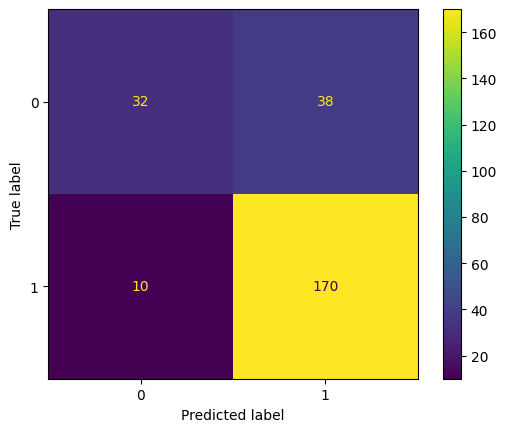

In [97]:
correlated_variables = ['Stanje na računu',
 'Istorija kredita',
 'Svrha uzimanja',
 'Račun za štednju',
 'Zaposlenost',
 'Pol i bračni staus',
 'Žirant Ko-aplikant',
 'Imovina',
 'Plaćanje u ratama',
 'Stan/Kuća',
 'Radnik stranac',
 'Godine starosti',
 'Iznos kredita',
 'Trajanje računa',
 'Odobren kredit']
Predictors=['Trajanje računa', 'Iznos kredita', 'Godine starosti', 'Zaposlenost',
       'Radnik stranac', 'Stanje na računu_0 <= <200 DM',
       'Stanje na računu_<0 DM', 'Stanje na računu_>= 200 DM ',
       'Stanje na računu_nema računa u ovoj banci',
       'Istorija kredita_drugi krediti plaćani na vreme',
       'Istorija kredita_kašnjenje sa uplatama',
       'Istorija kredita_kritičan račun',
       'Istorija kredita_nema uzetih kredita',
       'Istorija kredita_svi krediti u ovoj banci vraćeni na vreme',
       'Svrha uzimanja_automobil (nov)', 'Svrha uzimanja_automobil (polovan)',
       'Svrha uzimanja_bela tehnika', 'Svrha uzimanja_biznis',
       'Svrha uzimanja_muzička tehnika/televizija', 'Svrha uzimanja_nameštaj',
       'Svrha uzimanja_obrazovanje', 'Svrha uzimanja_ostalo',
       'Svrha uzimanja_popravka', 'Svrha uzimanja_prekvalifikovanje',
       'Račun za štednju_100 <= <500 DM', 'Račun za štednju_500 <= < 1000 DM',
       'Račun za štednju_<100 DM', 'Račun za štednju_>= 1000 DM',
       'Račun za štednju_nema račun za štednju',
       'Pol i bračni staus_muško, neoženjen',
       'Pol i bračni staus_muško, oženjen/udovac',
       'Pol i bračni staus_muško, razveden',
       'Pol i bračni staus_žensko, udata/razvedena',
       'Žirant Ko-aplikant_ko-aplikant', 'Žirant Ko-aplikant_nema',
       'Žirant Ko-aplikant_žirant', 'Imovina_automobil ili drugo',
       'Imovina_nema', 'Imovina_poseduje nekretninu',
       'Imovina_ulaganje u nekretnine/životno osiguranje',
       'Plaćanje u ratama_banka', 'Plaćanje u ratama_nema',
       'Plaćanje u ratama_radnja', 'Stan/Kuća_poseduje', 'Stan/Kuća_stanarina',
       'Stan/Kuća_živi besplatno']
TargetVariable='Odobren kredit'

DataForML = data[correlated_variables]
######################## TEST DATA PREPARATION ##############################
dataForTest=testData[correlated_variables]
dataForTest['Radnik stranac'].replace({'da':1, 'ne':0}, inplace=True)
dataForTest['Zaposlenost'].replace({'>=7 godina':5, '1<= < 4 godina':3, '4<= <7 godina':4, 'nezaposlen':1, '<=1 godina':2}, inplace=True)
dataForTest['Odobren kredit'].replace({'Da':1, 'Ne':0}, inplace=True)
dataForTest_Numeric=pd.get_dummies(dataForTest).astype(int)
testX = dataForTest_Numeric[Predictors].values
testy=dataForTest_Numeric[TargetVariable].values
PredictorScaler=MinMaxScaler()
PredictorScalerTistFit=PredictorScaler.fit(testX)
testX=PredictorScalerTistFit.transform(testX)
# print(DataForML.head())

# for corelated columns
DataForML['Radnik stranac'].replace({'da':1, 'ne':0}, inplace=True)
DataForML['Zaposlenost'].replace({'>=7 godina':5, '1<= < 4 godina':3, '4<= <7 godina':4, 'nezaposlen':1, '<=1 godina':2}, inplace=True)
DataForML['Odobren kredit'].replace({'Da':1, 'Ne':0}, inplace=True)

# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML).astype(int)

DataForML_Numeric.head()
# DataForML_Numeric.columns

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# PredictorScaler=StandardScaler()
# X = PredictorScaler.transform(X)

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Define the parameter grid
param_grid = {'n_neighbors': range(1, 21)}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best value of k
print("Optimal k:", grid_search.best_params_['n_neighbors'])

# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=7)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(testX)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(testy, prediction))
print(metrics.confusion_matrix(testy, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(testy, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, testX , testy, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

ConfusionMatrixDisplay.from_estimator(clf, testX, testy)
plt.show()

# # Find the optimal k using cross-validation
# optimal_k = None
# max_accuracy = 0

# # Try different values of k
# for k in range(1, 21):
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    
#     # Average accuracy over folds
#     avg_accuracy = scores.mean()
    
#     # Update optimal_k if a higher accuracy is found
#     if avg_accuracy > max_accuracy:
#         optimal_k = k
#         max_accuracy = avg_accuracy

# # Train the final model with the optimal k
# final_knn_model = KNeighborsClassifier(n_neighbors=optimal_k)
# final_knn_model.fit(X_train, y_train)

# # Evaluate the model on the test set
# accuracy_on_test_set = final_knn_model.score(X_test, y_test)

# # Print the results
# print(f"Optimal k: {optimal_k}")
# print(f"Accuracy on the test set: {accuracy_on_test_set:.4f}")

# # Plot the accuracy for different k values
# k_values = list(range(1, 21))
# accuracy_values = []

# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
#     avg_accuracy = scores.mean()
#     accuracy_values.append(avg_accuracy)

# plt.plot(k_values, accuracy_values, marker='o')
# plt.title('Cross-Validation Accuracy for Different k Values')
# plt.xlabel('k')
# plt.ylabel('Accuracy')
# plt.show()

# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN

GaussianNB()
              precision    recall  f1-score   support

           0       0.51      0.66      0.57        70
           1       0.85      0.76      0.80       180

    accuracy                           0.73       250
   macro avg       0.68      0.71      0.69       250
weighted avg       0.76      0.73      0.74       250

[[ 46  24]
 [ 44 136]]
Accuracy of the model on Testing Sample Data: 0.74

Accuracy values for 10-fold Cross Validation:
 [0.27466667 0.27466667 0.20224109 0.27466667 0.37487923 0.25300493
 0.40181818 0.25300493 0.37487923 0.3408867 ]

Final Average Accuracy of the model: 0.3


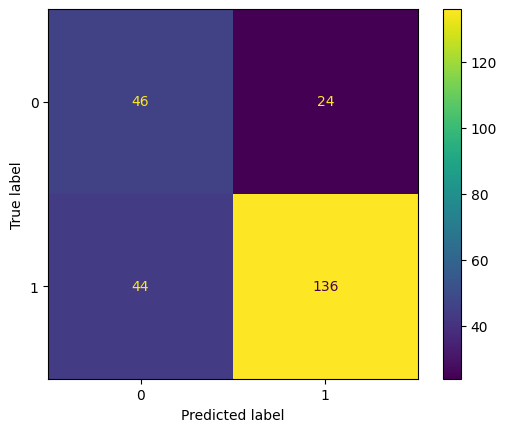

In [98]:
# Standardize the features (optional but can help with certain algorithms)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB

correlated_variables = ['Stanje na računu',
 'Istorija kredita',
 'Svrha uzimanja',
 'Račun za štednju',
 'Zaposlenost',
 'Pol i bračni staus',
 'Žirant Ko-aplikant',
 'Imovina',
 'Plaćanje u ratama',
 'Stan/Kuća',
 'Radnik stranac',
 'Godine starosti',
 'Iznos kredita',
 'Trajanje računa',
 'Odobren kredit']
Predictors=['Trajanje računa', 'Iznos kredita', 'Godine starosti', 'Zaposlenost',
       'Radnik stranac', 'Stanje na računu_0 <= <200 DM',
       'Stanje na računu_<0 DM', 'Stanje na računu_>= 200 DM ',
       'Stanje na računu_nema računa u ovoj banci',
       'Istorija kredita_drugi krediti plaćani na vreme',
       'Istorija kredita_kašnjenje sa uplatama',
       'Istorija kredita_kritičan račun',
       'Istorija kredita_nema uzetih kredita',
       'Istorija kredita_svi krediti u ovoj banci vraćeni na vreme',
       'Svrha uzimanja_automobil (nov)', 'Svrha uzimanja_automobil (polovan)',
       'Svrha uzimanja_bela tehnika', 'Svrha uzimanja_biznis',
       'Svrha uzimanja_muzička tehnika/televizija', 'Svrha uzimanja_nameštaj',
       'Svrha uzimanja_obrazovanje', 'Svrha uzimanja_ostalo',
       'Svrha uzimanja_popravka', 'Svrha uzimanja_prekvalifikovanje',
       'Račun za štednju_100 <= <500 DM', 'Račun za štednju_500 <= < 1000 DM',
       'Račun za štednju_<100 DM', 'Račun za štednju_>= 1000 DM',
       'Račun za štednju_nema račun za štednju',
       'Pol i bračni staus_muško, neoženjen',
       'Pol i bračni staus_muško, oženjen/udovac',
       'Pol i bračni staus_muško, razveden',
       'Pol i bračni staus_žensko, udata/razvedena',
       'Žirant Ko-aplikant_ko-aplikant', 'Žirant Ko-aplikant_nema',
       'Žirant Ko-aplikant_žirant', 'Imovina_automobil ili drugo',
       'Imovina_nema', 'Imovina_poseduje nekretninu',
       'Imovina_ulaganje u nekretnine/životno osiguranje',
       'Plaćanje u ratama_banka', 'Plaćanje u ratama_nema',
       'Plaćanje u ratama_radnja', 'Stan/Kuća_poseduje', 'Stan/Kuća_stanarina',
       'Stan/Kuća_živi besplatno']
TargetVariable='Odobren kredit'

######################## TEST DATA PREPARATION ##############################
dataForTest=testData[correlated_variables]
dataForTest['Radnik stranac'].replace({'da':1, 'ne':0}, inplace=True)
dataForTest['Zaposlenost'].replace({'>=7 godina':5, '1<= < 4 godina':3, '4<= <7 godina':4, 'nezaposlen':1, '<=1 godina':2}, inplace=True)
dataForTest['Odobren kredit'].replace({'Da':1, 'Ne':0}, inplace=True)
dataForTest_Numeric=pd.get_dummies(dataForTest).astype(int)
testX = dataForTest_Numeric[Predictors].values
testy=dataForTest_Numeric[TargetVariable].values

DataForML = data[correlated_variables]
# print(DataForML.head())

# for corelated columns
DataForML['Radnik stranac'].replace({'da':1, 'ne':0}, inplace=True)
DataForML['Zaposlenost'].replace({'>=7 godina':5, '1<= < 4 godina':3, '4<= <7 godina':4, 'nezaposlen':1, '<=1 godina':2}, inplace=True)
DataForML['Odobren kredit'].replace({'Da':1, 'Ne':0}, inplace=True)

# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML).astype(int)

DataForML_Numeric.head()
# DataForML_Numeric.columns

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
testX = scaler.transform(testX)
X_test = scaler.transform(X_test)

# Feature selection (optional but can improve performance)
k_best = SelectKBest(f_classif, k='all')  # You can adjust 'k' based on your data
X_train = k_best.fit_transform(X_train, y_train)
X_test = k_best.transform(X_test)

# # Train the Naive Bayes model
# nb_model = GaussianNB()
# nb_model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = nb_model.predict(testX)

# # Evaluate the model
# accuracy = accuracy_score(testy, y_pred)
# print(f"Accuracy: {accuracy:.4f}")

clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(testX)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(testy, prediction))
print(metrics.confusion_matrix(testy, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(testy, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, testX , testy, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

ConfusionMatrixDisplay.from_estimator(clf, testX, testy)
plt.show()

SVC(C=10, gamma=0.01)
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        70
           1       0.91      0.94      0.92       180

    accuracy                           0.89       250
   macro avg       0.87      0.85      0.86       250
weighted avg       0.89      0.89      0.89       250

[[ 53  17]
 [ 11 169]]
Accuracy of the model on Testing Sample Data: 0.89

Accuracy values for 10-fold Cross Validation:
 [0.58336347 0.65263158 0.59300699 0.62263368 0.56023392 0.57039627
 0.60650995 0.63669274 0.56590947 0.58981439]

Final Average Accuracy of the model: 0.6


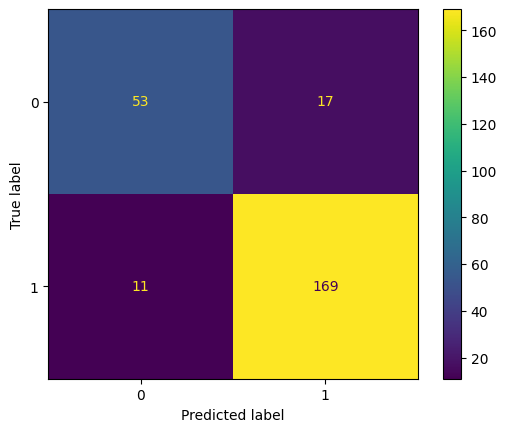

In [99]:
# Standardize the features (optional but can help with certain algorithms)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB

correlated_variables = ['Stanje na računu',
 'Istorija kredita',
 'Svrha uzimanja',
 'Račun za štednju',
 'Zaposlenost',
 'Pol i bračni staus',
 'Žirant Ko-aplikant',
 'Imovina',
 'Plaćanje u ratama',
 'Stan/Kuća',
 'Radnik stranac',
 'Godine starosti',
 'Iznos kredita',
 'Trajanje računa',
 'Odobren kredit']
Predictors=['Trajanje računa', 'Iznos kredita', 'Godine starosti', 'Zaposlenost',
       'Radnik stranac', 'Stanje na računu_0 <= <200 DM',
       'Stanje na računu_<0 DM', 'Stanje na računu_>= 200 DM ',
       'Stanje na računu_nema računa u ovoj banci',
       'Istorija kredita_drugi krediti plaćani na vreme',
       'Istorija kredita_kašnjenje sa uplatama',
       'Istorija kredita_kritičan račun',
       'Istorija kredita_nema uzetih kredita',
       'Istorija kredita_svi krediti u ovoj banci vraćeni na vreme',
       'Svrha uzimanja_automobil (nov)', 'Svrha uzimanja_automobil (polovan)',
       'Svrha uzimanja_bela tehnika', 'Svrha uzimanja_biznis',
       'Svrha uzimanja_muzička tehnika/televizija', 'Svrha uzimanja_nameštaj',
       'Svrha uzimanja_obrazovanje', 'Svrha uzimanja_ostalo',
       'Svrha uzimanja_popravka', 'Svrha uzimanja_prekvalifikovanje',
       'Račun za štednju_100 <= <500 DM', 'Račun za štednju_500 <= < 1000 DM',
       'Račun za štednju_<100 DM', 'Račun za štednju_>= 1000 DM',
       'Račun za štednju_nema račun za štednju',
       'Pol i bračni staus_muško, neoženjen',
       'Pol i bračni staus_muško, oženjen/udovac',
       'Pol i bračni staus_muško, razveden',
       'Pol i bračni staus_žensko, udata/razvedena',
       'Žirant Ko-aplikant_ko-aplikant', 'Žirant Ko-aplikant_nema',
       'Žirant Ko-aplikant_žirant', 'Imovina_automobil ili drugo',
       'Imovina_nema', 'Imovina_poseduje nekretninu',
       'Imovina_ulaganje u nekretnine/životno osiguranje',
       'Plaćanje u ratama_banka', 'Plaćanje u ratama_nema',
       'Plaćanje u ratama_radnja', 'Stan/Kuća_poseduje', 'Stan/Kuća_stanarina',
       'Stan/Kuća_živi besplatno']
TargetVariable='Odobren kredit'

######################## TEST DATA PREPARATION ##############################
dataForTest=testData[correlated_variables]
dataForTest['Radnik stranac'].replace({'da':1, 'ne':0}, inplace=True)
dataForTest['Zaposlenost'].replace({'>=7 godina':5, '1<= < 4 godina':3, '4<= <7 godina':4, 'nezaposlen':1, '<=1 godina':2}, inplace=True)
dataForTest['Odobren kredit'].replace({'Da':1, 'Ne':0}, inplace=True)
dataForTest_Numeric=pd.get_dummies(dataForTest).astype(int)
testX = dataForTest_Numeric[Predictors].values
testy=dataForTest_Numeric[TargetVariable].values

DataForML = data[correlated_variables]
# print(DataForML.head())

# for corelated columns
DataForML['Radnik stranac'].replace({'da':1, 'ne':0}, inplace=True)
DataForML['Zaposlenost'].replace({'>=7 godina':5, '1<= < 4 godina':3, '4<= <7 godina':4, 'nezaposlen':1, '<=1 godina':2}, inplace=True)
DataForML['Odobren kredit'].replace({'Da':1, 'Ne':0}, inplace=True)

# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML).astype(int)

DataForML_Numeric.head()
# DataForML_Numeric.columns

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
testX = scaler.transform(testX)
X_test = scaler.transform(X_test)

# Support Vector Machines(SVM)
from sklearn import svm
parameters = {'kernel': ('linear', 'rbf', 'poly'), 'C':[0.1, 1, 10], 'gamma':[1, 0.1, 0.01]}
svc = svm.SVC()
# instantiate the grid search with 5-fold cross-validation
#clf = GridSearchCV(svc, parameters, cv=5)
clf = svm.SVC(C=10, kernel='rbf', gamma=0.01)
#clf = svm.SVC(C=5, kernel='rbf', gamma=0.1)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
#print("Best Parameters:\n", clf.best_params_)
prediction=SVM.predict(testX)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(testy, prediction))
print(metrics.confusion_matrix(testy, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(testy, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

ConfusionMatrixDisplay.from_estimator(clf, testX, testy)
plt.show()

In [100]:
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

FunctionAnova(inpData=data, TargetVariable="Odobren kredit", ContinuousPredictorList=numerical)

def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

FunctionChisq(inpData=data, 
              TargetVariable="Odobren kredit",
              CategoricalVariablesList= nonNumerical)

##### ANOVA Results ##### 

Trajanje računa is correlated with Odobren kredit | P-Value: 6.488049877187189e-12
Iznos kredita is correlated with Odobren kredit | P-Value: 8.797572373533373e-07
Godine starosti is correlated with Odobren kredit | P-Value: 0.003925339398278295
Stanje na računu is correlated with Odobren kredit | P-Value: 1.2189020722893755e-26
Istorija kredita is correlated with Odobren kredit | P-Value: 1.2791872956750916e-12
Svrha uzimanja is correlated with Odobren kredit | P-Value: 0.00011574910079691637
Račun za štednju is correlated with Odobren kredit | P-Value: 2.7612142385682596e-07
Zaposlenost is correlated with Odobren kredit | P-Value: 0.0010454523491402541
Kamata – u procentima od tekućih prihoda is NOT correlated with Odobren kredit | P-Value: 0.1400333122128481
Pol i bračni staus is correlated with Odobren kredit | P-Value: 0.02223800546926877
Žirant Ko-aplikant is correlated with Odobren kredit | P-Value: 0.036055954027247226
Prebivalište (u godinama) is NO

['Stanje na računu',
 'Istorija kredita',
 'Svrha uzimanja',
 'Račun za štednju',
 'Zaposlenost',
 'Pol i bračni staus',
 'Žirant Ko-aplikant',
 'Imovina',
 'Plaćanje u ratama',
 'Stan/Kuća',
 'Radnik stranac',
 'Odobren kredit']

<Axes: xlabel='Iznos kredita', ylabel='Godine starosti'>

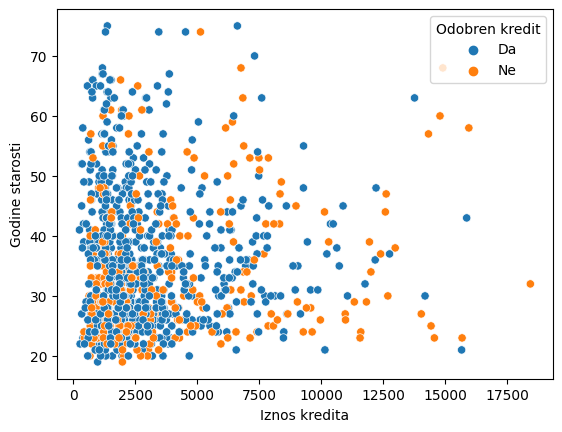

In [101]:

import seaborn as sns
# plt.style.use('seaborn-whitegrid')

# points = plt.scatter(x="Trajanje računa", y="Godine starosti", data=data)
# plt.title("Trajanje računa i Godine starosti")
# plt.xlabel("Trajanje računa")
# plt.ylabel("Godine starosti")
# plt.gray()

# sns.scatterplot(x="Trajanje računa", y="Godine starosti", hue="Odobren kredit" , data=data)

sns.scatterplot(x="Iznos kredita", y="Godine starosti", hue="Odobren kredit", data=data)

In [102]:

# Plotting histograms of multiple columns together
# Observe that ApplicantIncome and CoapplicantIncome has outliers
# data.hist(['Godine starosti'], figsize=(18,10))
# data.hist(['Iznos kredita'], figsize=(18,10))
# data.hist(['Trajanje računa'], figsize=(18,10))

# sns.pairplot(data[numerical]);

import matplotlib.pyplot as plt
import seaborn as sns


# fig = plt.figure(figsize = (20,15))
# axes = 320
# for cat in categorical:
#     axes += 1
#     fig.add_subplot(axes)
#     sns.countplot(data = data, x = cat)
#     plt.xticks(rotation=30)
# plt.show()

#create correlation
#corr = data.corr(method = 'pearson')

#convert correlation to numpy array
#mask = np.array(corr)

#to mask the repetitive value for each pair
# mask[np.tril_indices_from(mask)] = False
# fig, ax = plt.subplots(figsize = (15,12))
# fig.set_size_inches(15,15)
# sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

# fig = plt.figure(figsize = (15,10))
# axes = 220
# for num in numerical:
#     axes += 1
#     fig.add_subplot(axes)
#     sns.boxplot(data = data, x = num)
# plt.show()

# fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
# sns.distplot(data["Godine starosti"], ax=ax1)
# sns.distplot(data["Iznos kredita"], ax=ax2)
# sns.distplot(data["Trajanje računa"], ax=ax3)
# plt.tight_layout()
# plt.legend()

df_cluster = pd.DataFrame()
df_cluster["Iznos kredita"] = data["Iznos kredita"]
df_cluster["Godine starosti"] = data["Godine starosti"]
df_cluster["Trajanje računa"] = data["Trajanje računa"]

df_cluster_log = np.log(df_cluster[["Godine starosti", "Iznos kredita", "Trajanje računa"]])

# df_cluster = data
# df_cluster["Iznos kredita"] = df_cluster_log["Iznos kredita"]
# df_cluster["Godine starosti"] = df_cluster_log["Godine starosti"]
# df_cluster["Trajanje računa"] = df_cluster_log["Trajanje računa"]

df_cluster.head()

# fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
# sns.distplot(df_cluster["Godine starosti"], ax=ax1)
# sns.distplot(df_cluster["Iznos kredita"], ax=ax2)
# sns.distplot(df_cluster["Trajanje računa"], ax=ax3)
# plt.tight_layout()

,Iznos kredita,Godine starosti,Trajanje računa
0,1169,67,6
1,5951,22,48
2,2096,49,12
3,7882,45,42
4,4870,53,24


In [103]:
# transforming data for ML
selectedColumns = [
 'Trajanje računa', 
 'Iznos kredita', 
 'Godine starosti']

datasetForTransform = df_cluster[selectedColumns]

# print("Columns data types:\n{}".format(datasetForTransform.dtypes))
# print("Unique values in each categorical column:")
# for col in datasetForTransform.select_dtypes(include=[object]):
#     print(col,":", datasetForTransform[col].unique())

#datasetForTransform['Radnik stranac'].replace({'da':1, 'ne':0}, inplace=True)
#datasetForTransform['Zaposlenost'].replace({'>=7 godina':5, '1<= < 4 godina':3, '4<= <7 godina':4, 'nezaposlen':1, '<=1 godina':2}, inplace=True)

datasetForTransform.head()

# Treating all the nominal variables at once using dummy variables
#DataForML_Numeric=pd.get_dummies(datasetForTransform)

# Adding Target Variable to the data
#DataForML_Numeric['Odobren kredit']=data['Odobren kredit']

#DataForML_Numeric['Odobren kredit'].replace({'Da':1, 'Ne':0}, inplace=True)
# Printing sample rows
DataForML_Numeric = datasetForTransform

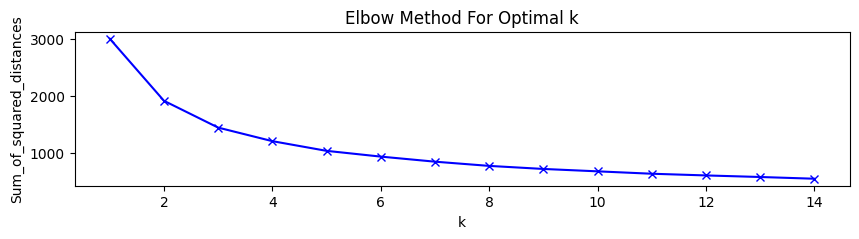

K-Means


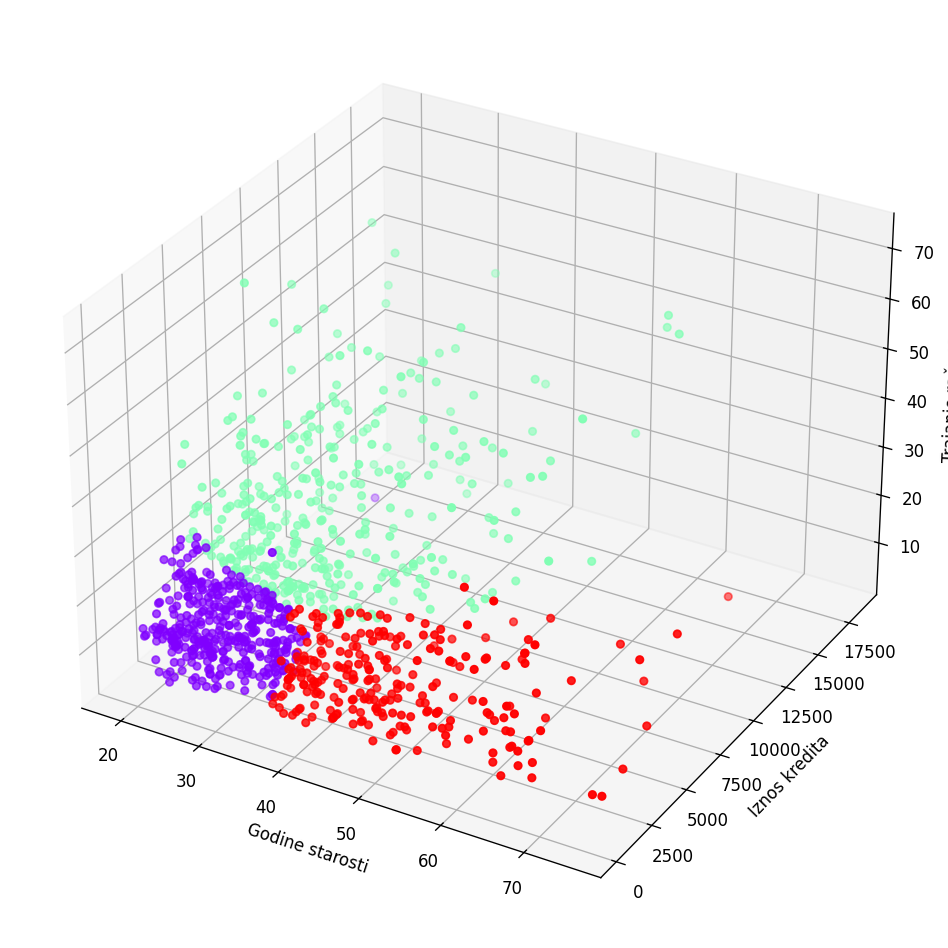

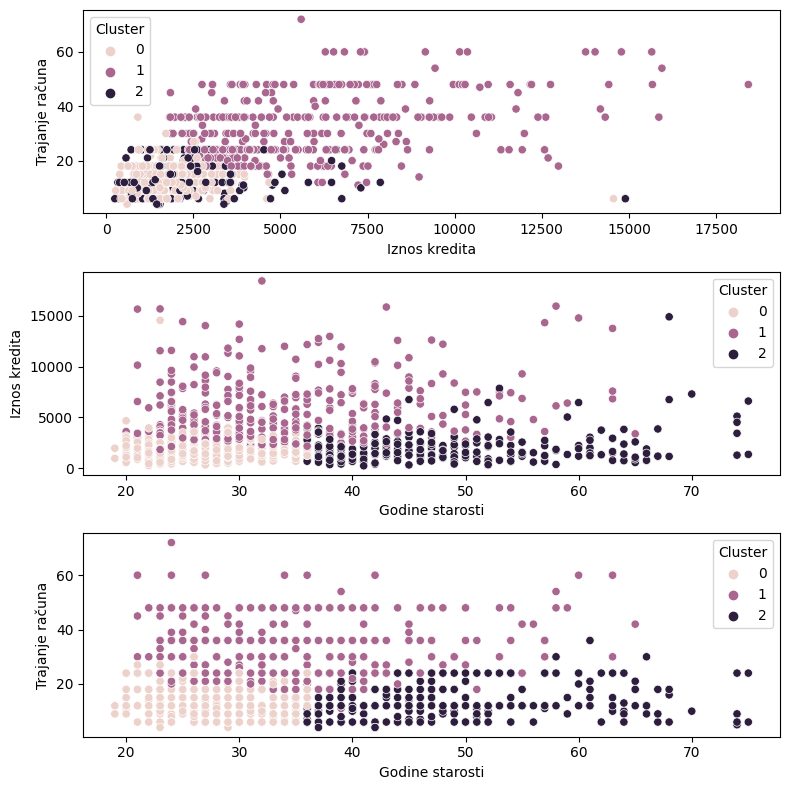

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(df_cluster_log)

from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(10,2))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters=3)
model.fit(cluster_scaled)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(20, 10), dpi=120, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(df_cluster['Godine starosti'],df_cluster['Iznos kredita'],df_cluster['Trajanje računa'],c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('Godine starosti', linespacing=3.2)
yLabel = ax.set_ylabel('Iznos kredita', linespacing=3.1)
zLabel = ax.set_zlabel('Trajanje računa', linespacing=3.4)
print("K-Means")

def scatters(data, h=None, pal=None):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.scatterplot(x="Iznos kredita",y="Trajanje računa", hue=h, palette=pal, data=data, ax=ax1)
    sns.scatterplot(x="Godine starosti",y="Iznos kredita", hue=h, palette=pal, data=data, ax=ax2)
    sns.scatterplot(x="Godine starosti",y="Trajanje računa", hue=h, palette=pal, data=data, ax=ax3)
    plt.tight_layout()

labels = pd.DataFrame(kmeans_labels)
data2 = df_cluster.assign(Cluster=labels)
scatters(data2, 'Cluster')

In [105]:
grouped_km = data2.groupby(['Cluster']).mean().round(1)
grouped_km

,Iznos kredita,Godine starosti,Trajanje računa
Cluster,,,
0,1754.4,27.8,14.5
1,5722.0,34.2,32.4
2,1974.5,48.7,13.8


In [106]:
import matplotlib.pyplot as plt
# fig, PlotCanvas=plt.subplots(nrows=len(nonNumerical), ncols=1, figsize=(20,190))
# plt.subplots_adjust(hspace=0.7)

# Creating Grouped bar plots for each categorical predictor against the Target Variable "GoodCredit"
# for CategoricalCol , i in zip(nonNumerical, range(len(nonNumerical))):
#     CrossTabResult=pd.crosstab(index=data[CategoricalCol], columns=data["Odobren kredit"])
#     CrossTabResult.plot.bar(color=['green','red'], ax=PlotCanvas[i])
#     display(CrossTabResult)

In [107]:
# from mlxtend.frequent_patterns import apriori
# from mlxtend.frequent_patterns import association_rules
# from IPython.display import display

# # data_encoded_before = data

# # data_encoded_before['Radnik stranac'].replace({'da':1, 'ne':0}, inplace=True)
# # data_encoded_before['Zaposlenost'].replace({'>=7 godina':5, '1<= < 4 godina':3, '4<= <7 godina':4, 'nezaposlen':1, '<=1 godina':2}, inplace=True)

# # data_encoded_before['Odobren kredit'].replace({'Da':1, 'Ne':0}, inplace=True)

# # # Define the bin edges (bin boundaries)
# # godine_bin_edges = [0, 30, 50, 80]  # Adjust these boundaries as needed

# # # Define labels for the bins (optional)
# # godine_bin_labels = ['Mlada osoba', 'Sredovecna osoba', 'Penzioner']

# # # Use the cut() function to create bins
# # data_encoded_before['Godine starosti po kategorijama'] = pd.cut(data_encoded_before['Godine starosti'], bins=godine_bin_edges, labels=godine_bin_labels)

# # # Define the bin edges (bin boundaries)
# # iznos_bin_edges = [0, 7500, 15000, 20000]  # Adjust these boundaries as needed

# # # Define labels for the bins (optional)
# # iznos_bin_labels = ['mali iznos', 'srednji iznos', 'veci iznos']

# # # Use the cut() function to create bins
# # data_encoded_before['Iznos kredita po kategorijama'] = pd.cut(data_encoded_before['Iznos kredita'], bins=iznos_bin_edges, labels=iznos_bin_labels)


# #data_encoded = pd.get_dummies(data_encoded_before)

# # print("Columns data types:\n{}".format(data_encoded.dtypes))
# # print("Unique values in each categorical column:")
# # for col in data_encoded.select_dtypes(include=[object]):
# #     print(col,":", data_encoded[col].unique())

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_colwidth', None)
# data_encoded.head()

# data_encoded = data_encoded.drop(columns=['Trajanje računa', 'Iznos kredita', 'Zaposlenost', 'Godine starosti', 'Prebivalište (u godinama)', 'Kamata – u procentima od tekućih prihoda', 'Postojeći kredit u ovoj banci', 'Izdržavani: broj lica koji zavise od prihoda aplikanta'])

# data_encoded.head()

# frequent_itemsets = apriori(data_encoded, min_support=0.4, use_colnames=True)

# # frequent_itemsets

# rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# # rules

# # target_rules = rules.loc[rules['consequents'] == {'Odobren kredit'}]

# # target_rules

# # kreiranje novih kolona na osnovu asocijativnih pravila
# # def apply_rules(row):
# #     for idx, rule in rules.iterrows():
# #         if set(rule['antecedents']).issubset(row) and set(rule['consequents']).issubset(row):
# #             return 'Rule ' + str(idx)

# # data['association_rule'] = data.apply(apply_rules, axis=1)



   Kamata – u procentima od tekućih prihoda  Prebivalište (u godinama)  \
0                                         4                          4   
1                                         2                          2   
2                                         2                          3   
3                                         2                          4   
4                                         3                          4   

   Postojeći kredit u ovoj banci                                  Vrsta posla  \
0                              2          zaposlen i ima zvanično obrazovanje   
1                              1          zaposlen i ima zvanično obrazovanje   
2                              1  nema zvanično obrazovanje: ima stalan posao   
3                              1          zaposlen i ima zvanično obrazovanje   
4                              2          zaposlen i ima zvanično obrazovanje   

   Izdržavani: broj lica koji zavise od prihoda aplikanta Telefon  \

2440.9806840694173

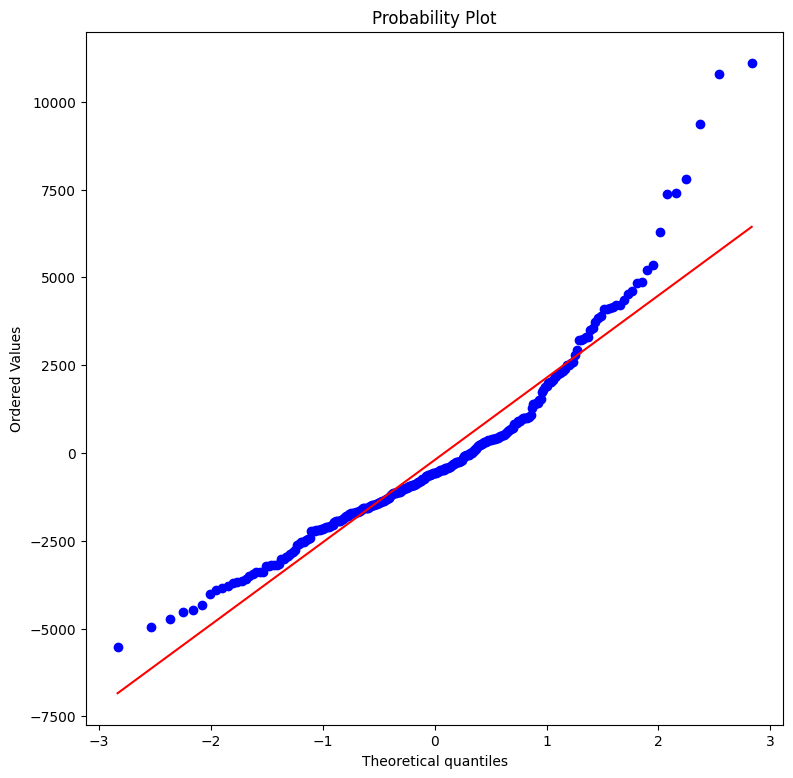

In [108]:
from scipy import stats
from regressors import stats as stats2
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

TargetVariable='Iznos kredita'
correlated_columns = ['Trajanje računa','Iznos kredita','Godine starosti','Stanje na računu',
 'Istorija kredita',
 'Svrha uzimanja',
 'Račun za štednju',
 'Zaposlenost',
 'Pol i bračni staus',
 'Žirant Ko-aplikant',
 'Imovina',
 'Plaćanje u ratama',
 'Stan/Kuća',
 'Radnik stranac',
 'Odobren kredit']

not_correlated_columns=[
      'Kamata – u procentima od tekućih prihoda',
'Prebivalište (u godinama)',
'Postojeći kredit u ovoj banci',
'Vrsta posla',
'Izdržavani: broj lica koji zavise od prihoda aplikanta',
'Telefon',
'Odobren kredit',
'Iznos kredita'
]

predictorCol = ['Trajanje računa', 'Godine starosti', 'Zaposlenost',
       'Radnik stranac', 'Odobren kredit',
       'Stanje na računu_0 <= <200 DM', 'Stanje na računu_<0 DM',
       'Stanje na računu_>= 200 DM ',
       'Stanje na računu_nema računa u ovoj banci',
       'Istorija kredita_drugi krediti plaćani na vreme',
       'Istorija kredita_kašnjenje sa uplatama',
       'Istorija kredita_kritičan račun',
       'Istorija kredita_nema uzetih kredita',
       'Istorija kredita_svi krediti u ovoj banci vraćeni na vreme',
       'Svrha uzimanja_automobil (nov)', 'Svrha uzimanja_automobil (polovan)',
       'Svrha uzimanja_bela tehnika', 'Svrha uzimanja_biznis',
       'Svrha uzimanja_muzička tehnika/televizija', 'Svrha uzimanja_nameštaj',
       'Svrha uzimanja_obrazovanje', 'Svrha uzimanja_ostalo',
       'Svrha uzimanja_popravka', 'Svrha uzimanja_prekvalifikovanje',
       'Račun za štednju_100 <= <500 DM', 'Račun za štednju_500 <= < 1000 DM',
       'Račun za štednju_<100 DM', 'Račun za štednju_>= 1000 DM',
       'Račun za štednju_nema račun za štednju',
       'Pol i bračni staus_muško, neoženjen',
       'Pol i bračni staus_muško, oženjen/udovac',
       'Pol i bračni staus_muško, razveden',
       'Pol i bračni staus_žensko, udata/razvedena',
       'Žirant Ko-aplikant_ko-aplikant', 'Žirant Ko-aplikant_nema',
       'Žirant Ko-aplikant_žirant', 'Imovina_automobil ili drugo',
       'Imovina_nema', 'Imovina_poseduje nekretninu',
       'Imovina_ulaganje u nekretnine/životno osiguranje',
       'Plaćanje u ratama_banka', 'Plaćanje u ratama_nema',
       'Plaćanje u ratama_radnja', 'Stan/Kuća_poseduje', 'Stan/Kuća_stanarina',
       'Stan/Kuća_živi besplatno']

predictorCol_notCorrelated = ['Kamata – u procentima od tekućih prihoda', 'Prebivalište (u godinama)',
       'Postojeći kredit u ovoj banci',
       'Izdržavani: broj lica koji zavise od prihoda aplikanta',
       'Vrsta posla_nema zvanično obrazovanje: ima stalan posao',
       'Vrsta posla_nezposlen/nema zvanično obrazovanje',
       'Vrsta posla_radi u menadžmentu/samo-zaposlen/visoko obrazovanje',
       'Vrsta posla_zaposlen i ima zvanično obrazovanje', 'Telefon_ima',
       'Telefon_nema']

data_for_regresion = data[not_correlated_columns]
print(data_for_regresion.head())

# for corelated columns
# data_for_regresion['Radnik stranac'].replace({'da':1, 'ne':0}, inplace=True)
# data_for_regresion['Zaposlenost'].replace({'>=7 godina':5, '1<= < 4 godina':3, '4<= <7 godina':4, 'nezaposlen':1, '<=1 godina':2}, inplace=True)
data_for_regresion['Odobren kredit'].replace({'Da':1, 'Ne':0}, inplace=True)

# Treating all the nominal variables at once using dummy variables
DataForMLReg_Numeric=pd.get_dummies(data_for_regresion,).astype(int)

# # save data to csv
DataForMLReg_Numeric.to_csv("german_credit_data_with_header_multiple_regression2.csv", index=False, encoding='utf-8-sig')

# # Printing sample rows
DataForMLReg_Numeric.head()

# # Printing all the column names for our reference
DataForMLReg_Numeric.columns

X=DataForMLReg_Numeric[predictorCol_notCorrelated].to_numpy()
y=DataForMLReg_Numeric[TargetVariable].to_numpy()

# # Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# # Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# plt.scatter(X_test, y_test, color='blue', label='Actual Data')
# plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
# plt.xlabel('Trajanje')
# plt.ylabel('Iznos kredita')
# plt.legend()
# plt.show()

coefficient = model.coef_
intercept = model.intercept_

counter = 0
print('Attriute    Coefficient')
for pred in predictorCol_notCorrelated:
       print(f"{pred}  {coefficient[counter]}")
       counter+=1

print(f"Intercept: {intercept}")

r_squared=model.score(X,y)

print(f"R-squared: {r_squared}")
# računjanje residuals
residuals=y_test-y_pred
df=pd.DataFrame(residuals)
df.describe()

plt.figure(figsize=(9,9))

stats.probplot(residuals, dist="norm", plot=plt);

# računjanje R-squared error-a
SSResiduals = (residuals**2).sum()
SSTotal = ((y - y.mean())**2).sum()
result=1 - (SSResiduals/SSTotal)
print(f'R-squared error: {result}')

Xa=DataForMLReg_Numeric[predictorCol_notCorrelated]
ya=DataForMLReg_Numeric[TargetVariable]

X2 = sm.add_constant(Xa)
est = sm.OLS(ya, X2)
est2 = est.fit()
print(est2.summary())

# Calculate the correlation coefficient (Pearson correlation)
correlation_coefficient = (r_squared)**0.5

print(f"R-squared: {r_squared}")
print(f"Correlation Coefficient: {correlation_coefficient}")

r_squared = r2_score(y_test, y_pred)
print(f'Squared Correlation: {r_squared}')


# računjanje 
from sklearn.metrics import mean_squared_error

def rmse(predicted, targets):
    """
    Computes root mean squared error of two numpy ndarrays
    
    Args:
        predicted: an ndarray of predictions
        targets: an ndarray of target values
    
    Returns:
        The root mean squared error as a float
    """
    return (np.sqrt(np.mean((targets-predicted)**2)))

print(f'Root mean squared error {rmse(y_pred, y_test)}')

RMSE = mean_squared_error(y_pred, y_test)**0.5

RMSE